# Descriptive Analysis

Import the necessary libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

Reading the excel file

In [6]:
df = pd.read_excel("Data/Visualization_Data.xlsx")

Percentage of students with MDD

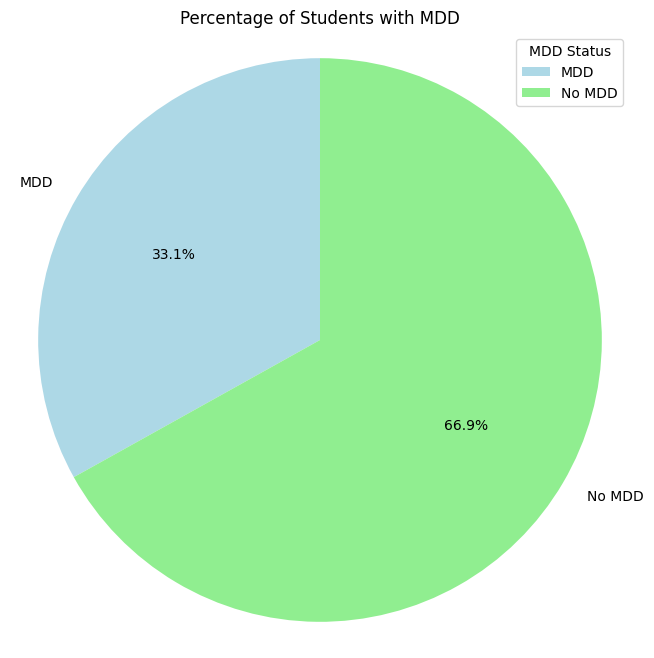

In [15]:
# Group by the depression status and sum weights for each group
weighted_counts = df.groupby('depression_status')['Post_Stratification_Weight'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(weighted_counts, labels=weighted_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Percentage of Students with MDD')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='MDD Status')
plt.show()


Depression with Gender

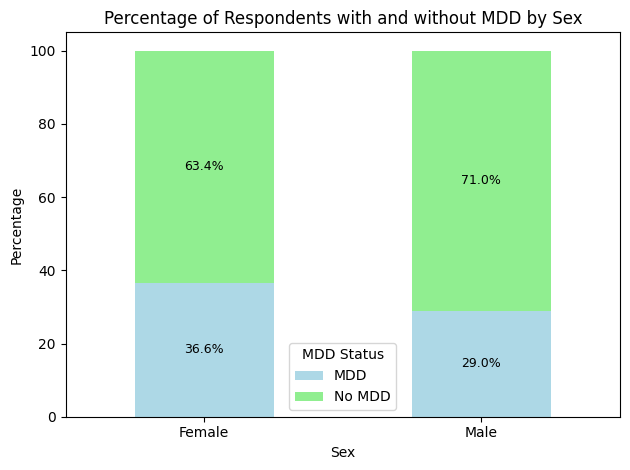

In [16]:
# Group by Sex and depression status and sum weights for each group
group_data = df.groupby(['Sex', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by sex to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Respondents with and without MDD by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='MDD Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                   group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()

Depression with Alcohol Consumption

C:\Users\Acer\AppData\Local\Temp\ipykernel_15280\366249763.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


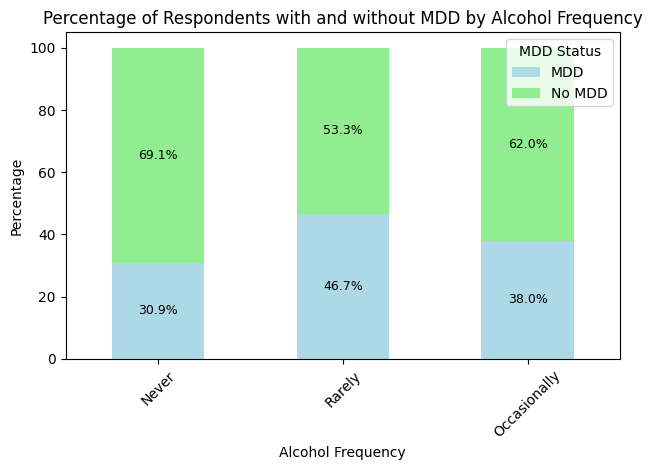

In [19]:
# Define the desired order for the Alcohol_Frequency category
category_order = pd.CategoricalDtype(['Never', 'Rarely', 'Occasionally'], ordered=True)
df['Alcohol_Frequency'] = pd.Categorical(df['Alcohol_Frequency'], categories=category_order.categories, ordered=True)


# Group by Alcohol_Frequency and depression status and sum weights for each group
group_data = df.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Alcohol_Frequency to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Respondents with and without MDD by Alcohol Frequency')
plt.xlabel('Alcohol Frequency')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='MDD Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                   group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Depression with Alocohol Consumption in Females

C:\Users\Acer\AppData\Local\Temp\ipykernel_15280\4051356074.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_female['Alcohol_Frequency'] = pd.Categorical(df_female['Alcohol_Frequency'], categories=category_order.categories, ordered=True)
C:\Users\Acer\AppData\Local\Temp\ipykernel_15280\4051356074.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_data = df_female.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)


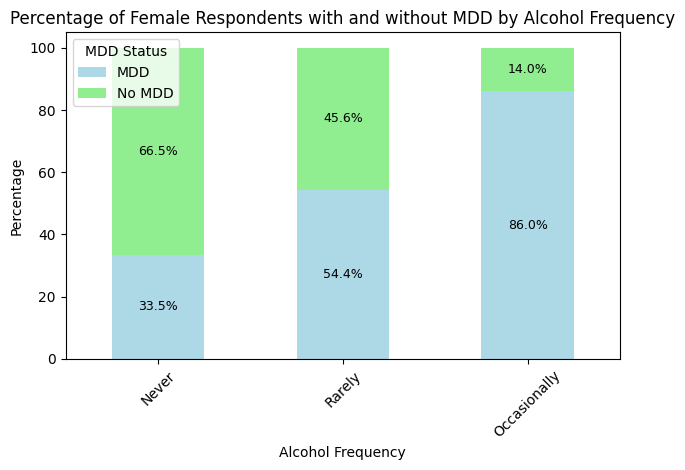

In [23]:
# Filter for only Female data
df_female = df[df['Sex'] == 'Female']

# Define the desired order for the Alcohol_Frequency category
category_order = pd.CategoricalDtype(['Never', 'Rarely', 'Occasionally'], ordered=True)
df_female['Alcohol_Frequency'] = pd.Categorical(df_female['Alcohol_Frequency'], categories=category_order.categories, ordered=True)

# Group by Alcohol_Frequency and depression status and sum weights for each group
group_data = df_female.groupby(['Alcohol_Frequency', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Alcohol_Frequency to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Female Respondents with and without MDD by Alcohol Frequency')
plt.xlabel('Alcohol Frequency')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='MDD Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


Year of study with Depression

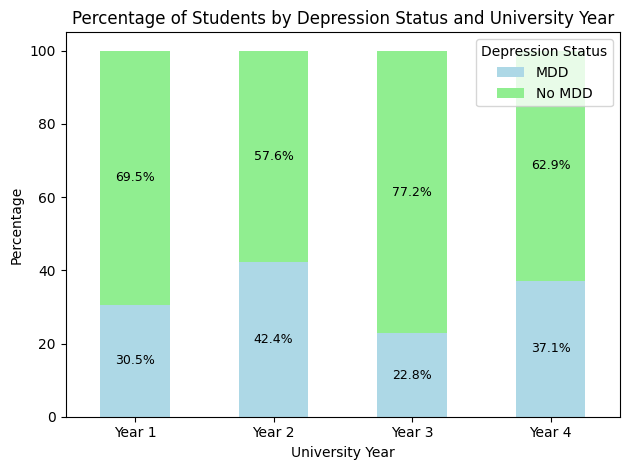

In [25]:
# Group by Uni_Year and depression status and sum weights for each group
group_data = df.groupby(['Uni_Year', 'depression_status'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Uni_Year to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
plt.title('Percentage of Students by Depression Status and University Year')
plt.xlabel('University Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Depression Status')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()


University Year with Stress

In [28]:
#Let us Categorize the Academic Stress as Low Stress, Moderate Stress and High Stress

# Dictionary to map the stress levels
stress_mapping = {
    1: 'Low Stress',
    2: 'Low Stress',
    3: 'Moderate Stress',
    4: 'High Stress',
    5: 'High Stress'
}

# Map the values using the dictionary
df['Academic_Stress_Categorized'] = df['Academic_Stress'].map(stress_mapping)


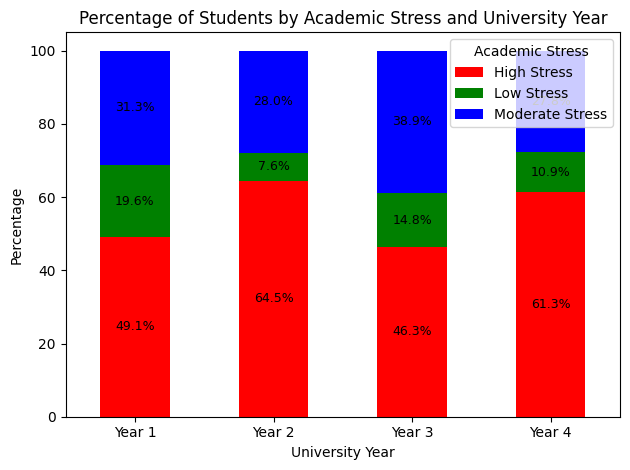

In [29]:
# Group by Uni_Year and Academic_Stress and sum weights for each group
group_data = df.groupby(['Uni_Year', 'Academic_Stress_Categorized'])['Post_Stratification_Weight'].sum().unstack(fill_value=0)

# Normalize data by Uni_Year to get percentages
group_data_percentage = group_data.div(group_data.sum(axis=1), axis=0) * 100

# Create a stacked bar chart
ax = group_data_percentage.plot(kind='bar', stacked=True, color=['red', 'green', 'blue'])
plt.title('Percentage of Students by Academic Stress and University Year')
plt.xlabel('University Year')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Academic Stress')

# Annotating the percentage on each bar
for n, x in enumerate([*group_data_percentage.index.values]):
    for (proportion, y_loc) in zip(group_data_percentage.loc[x],
                                  group_data_percentage.loc[x].cumsum()):
        plt.text(x=n, y=(y_loc - proportion) + (proportion / 2), s=f'{proportion:.1f}%', 
                 ha='center', va='center', fontsize=9, color='black')

plt.tight_layout()
plt.show()
